# 2.3 Random Forest - Belgrade

#### Importing libraries and data
#### Import unscaled data and pleasant weather sets (from 2.2)
#### Data Wrangling - Data for Belgrade (all years)
#### Reshaping for modeling
#### Data Split
#### Random Forest model
#### Creating Feature Importances

### Importing Libraries

In [56]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

In [7]:
#Define path
path = r'C:\Users\melan\OneDrive\Career Foundry\Machine Learning with Python\Data Sets'

In [10]:
path

'C:\\Users\\melan\\OneDrive\\Career Foundry\\Machine Learning with Python\\Data Sets'

In [12]:
#Import the cleaned unscaled data
X = pd.read_csv(os.path.join(path, 'unscaled_withdate.csv'), index_col = False)

In [14]:
X.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,...,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,19600102,1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,...,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,19600103,1,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,...,4.1,7,0.91,1.0096,0.17,0.08,0.1,10.5,8.1,12.9
3,19600104,1,3,0.92,1.018,0.58,0.00,4.1,6.3,3.8,...,2.3,7,0.86,1.0184,0.13,0.98,0.0,7.4,7.3,10.6
4,19600105,1,6,0.95,1.018,0.65,0.14,5.4,3.0,-0.7,...,4.3,3,0.80,1.0328,0.46,0.00,5.7,5.7,3.0,8.4


In [16]:
#Import the predictions data
pleasant_weather = pd.read_csv(os.path.join(path,'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

In [18]:
pleasant_weather.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
X.shape

(22950, 137)

In [22]:
pleasant_weather.shape

(22950, 16)

Both X and y have the correct shapes

### Data Wrangling

In [24]:
#Reducing the data to ONLY BELGRADE
Belgrade_list = list(x for x in X.columns if x.find('BELGRADE') >=0)
Belgrade_list

['BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max']

In [26]:
# Now let's create a dataframe with those columns
Belgrade_df = X[Belgrade_list]
Belgrade_df.head()

,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max
0,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9
1,6,0.84,1.0172,0.25,0.00,0.0,2.9,2.2,4.4
2,6,0.77,1.0179,0.67,0.00,3.5,3.1,-0.5,6.4
3,8,0.93,1.0268,0.25,0.00,0.0,2.0,-2.0,3.0
4,8,0.99,1.0286,0.25,0.06,0.0,2.0,0.7,2.8


In [28]:
Belgrade_df.shape

(22950, 9)

In [30]:
# Next we need to reduce the pleasant_weather dataset to ONLY Belgrade
pleasant_weather_Belgrade = pleasant_weather['BELGRADE_pleasant_weather']
pleasant_weather_Belgrade

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: BELGRADE_pleasant_weather, Length: 22950, dtype: int64

In [32]:
pleasant_weather_Belgrade.shape

(22950,)

### Reshaping for modeling

In [36]:
X2 = Belgrade_df

In [38]:
y2 = pleasant_weather_Belgrade

In [40]:
# Let's turn them from a dataframe into an array
X = np.array(X2)
y = np.array(y2)

In [42]:
X.shape

(22950, 9)

In [44]:
y.shape

(22950,)

### Data Split

In [46]:
# Split data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [48]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


### Random Forest Model

In [58]:
# Here we go! Creating the RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [60]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


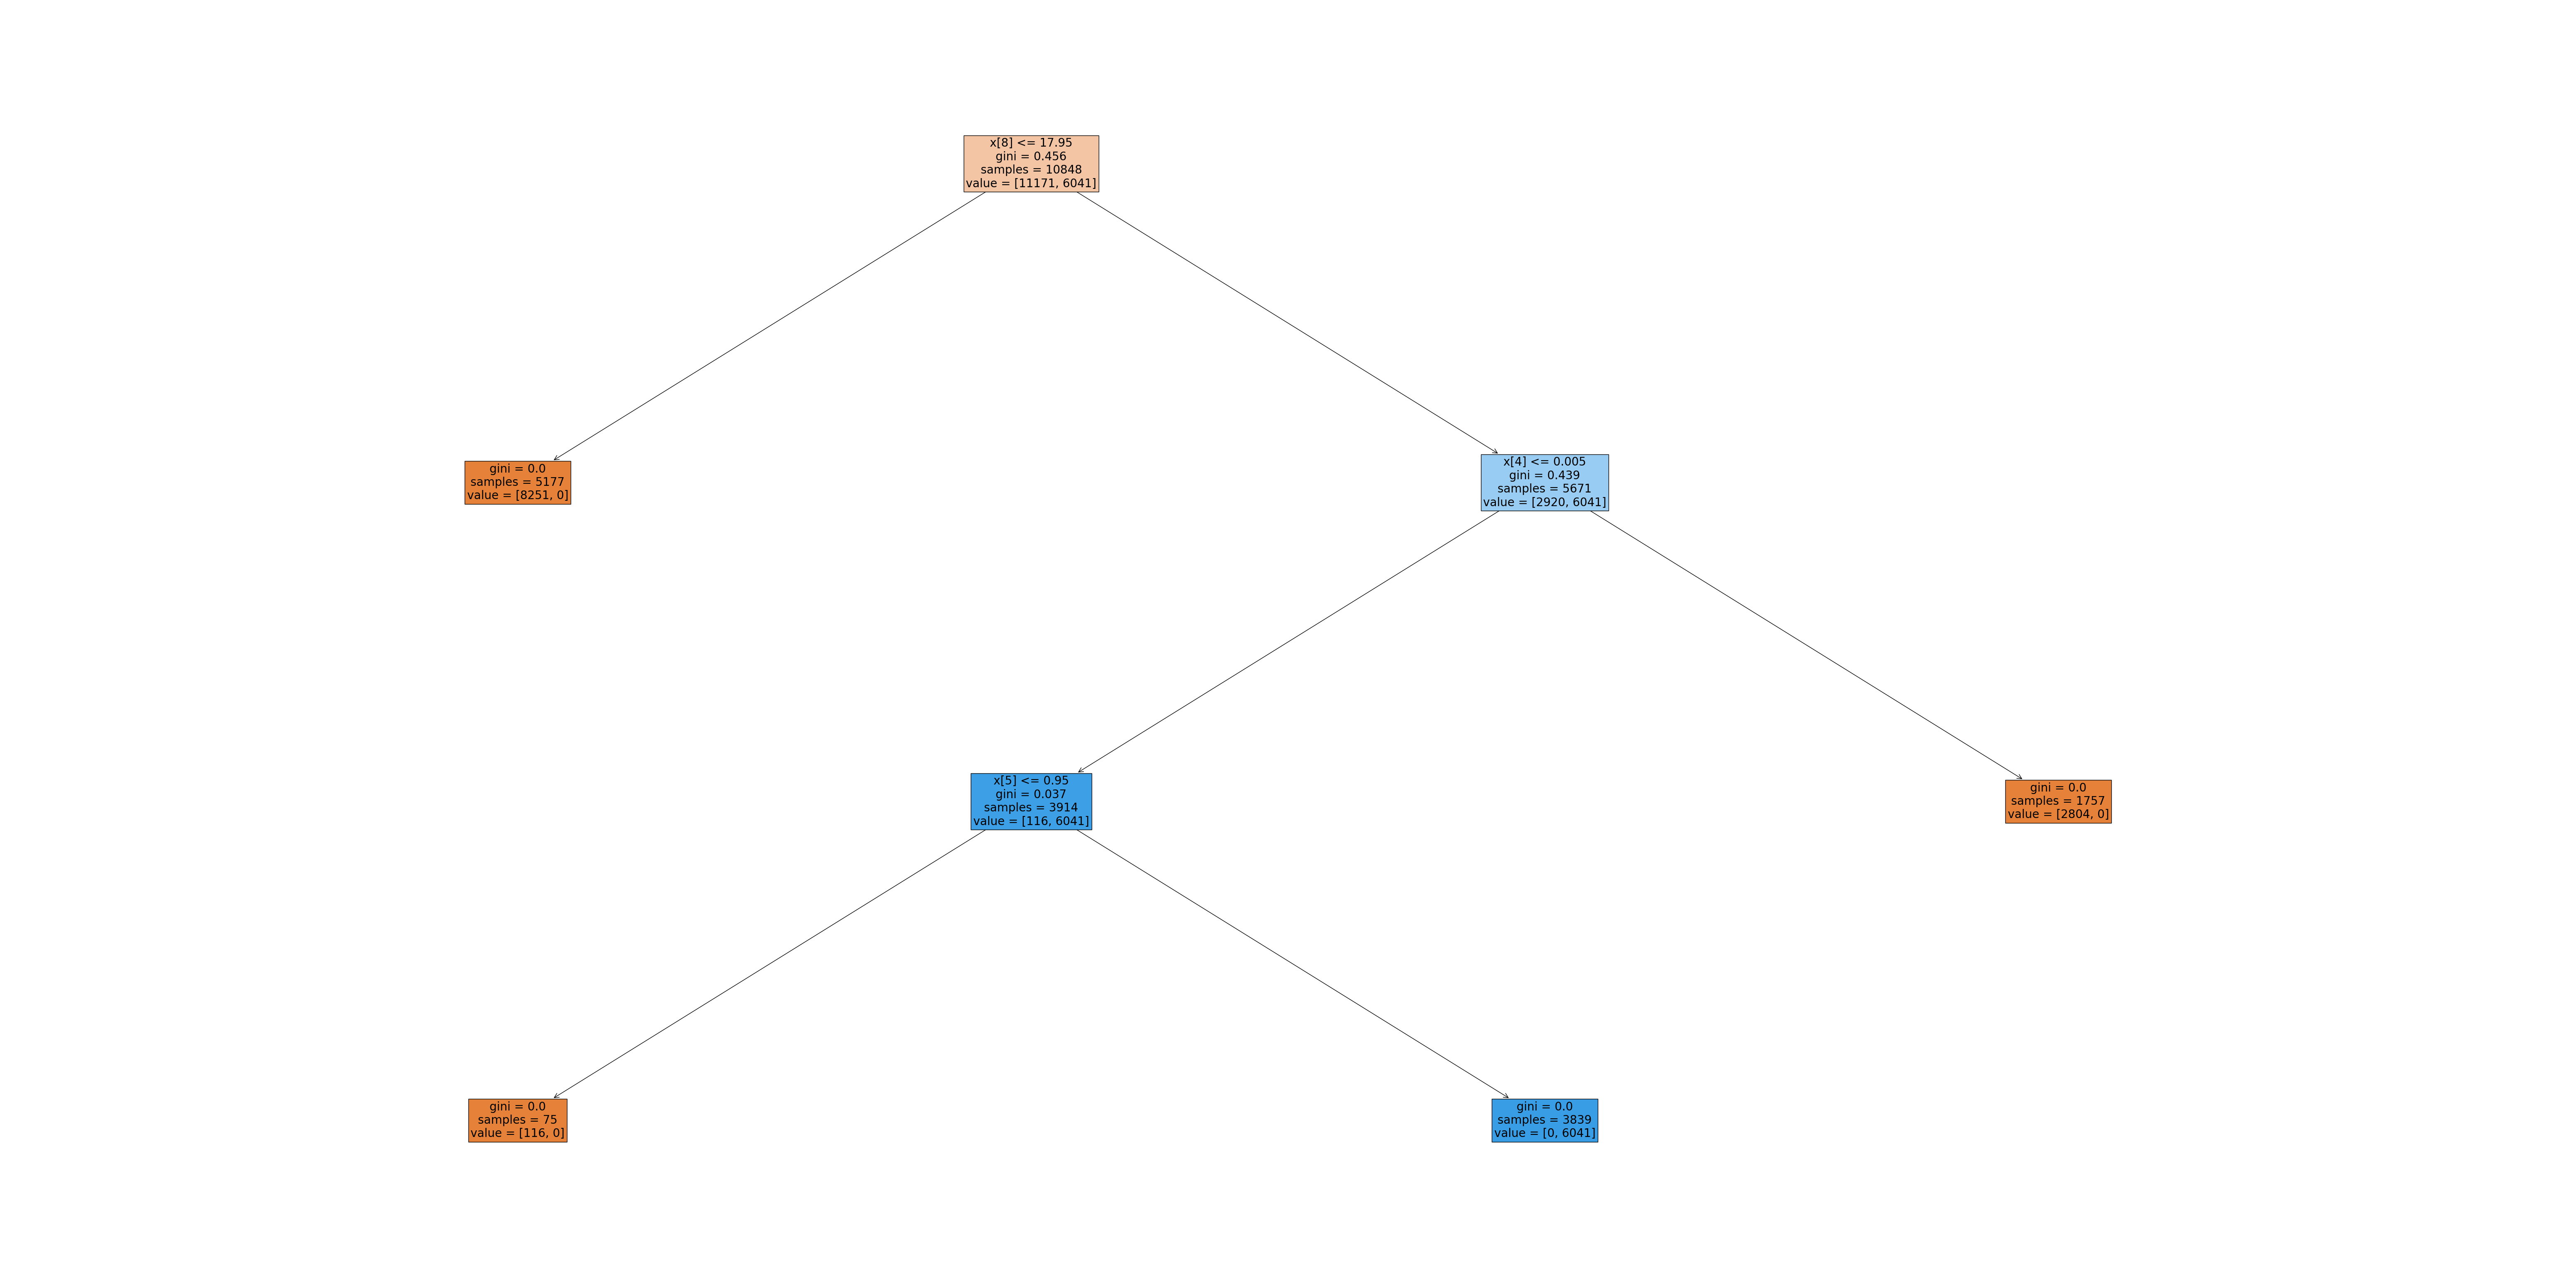

In [62]:
# Class_names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[16], fontsize = 20,filled=True)
fig.savefig(os.path.join(path, 'Visualizations', 'Belgrade_random_forest'), bbox_inches = 'tight')

### Feature Importances

In [64]:
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([0.03520077, 0.01628297, 0.00984671, 0.03154428, 0.36214421,
       0.09405031, 0.13839891, 0.02946085, 0.283071  ])

In [68]:
# We need a list of the weather features
features_list = [feature.replace('BELGRADE_', '') for feature in Belgrade_list]
features_list

['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

In [70]:
# Create a list of importances of weather features
important = pd.Series(newarray, index = features_list)
important

cloud_cover         0.035201
humidity            0.016283
pressure            0.009847
global_radiation    0.031544
precipitation       0.362144
sunshine            0.094050
temp_mean           0.138399
temp_min            0.029461
temp_max            0.283071
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


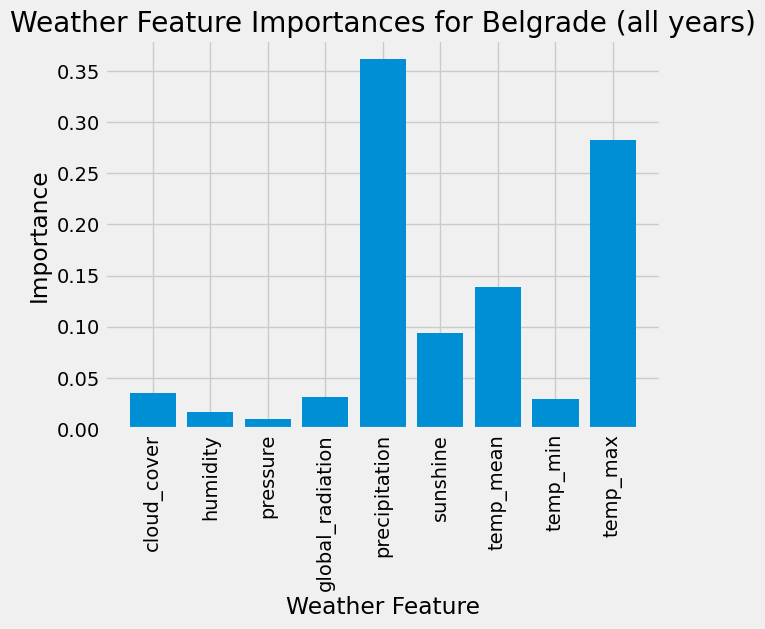

In [72]:
# Plot the Weather Feature Importances for Belgrade!
%matplotlib inline

plt.style.use('fivethirtyeight')
x_values = list(range(len(newarray)))
print(features_list)

plt.bar(x_values, newarray, orientation = 'vertical')
plt.xticks(x_values, features_list, rotation='vertical')
plt.xlabel('Weather Feature')
plt.ylabel('Importance')
plt.title('Weather Feature Importances for Belgrade (all years)');

plt.savefig(os.path.join(path, 'Visualizations', 'Belgrade_feature_importances.png'), bbox_inches = 'tight')
plt.show()